In [ ]:
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

In [ ]:
class Qlearning:
    # Hyper Parameters are set here
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        #self.values = values
        #self.options = []

    # Reset 
    def game_begin(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        #self.options = self.values.copy()

    # esplion greedy stratergy
    def epslion_greedy(self, state, possible_moves): #esplion greedy algorithm
        #return  action
        self.last_board = tuple(state)
        if(random.random() < self.epsilon):
            move = random.choice(possible_moves) ##action
            self.state_action_last=(self.last_board,move)
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: #greedy strategy
            Q_list=[]
            for action in possible_moves:
                Q_list.append(self.getQ(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # more than 1 best option; choose among them randomly
                best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(best_options)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.getQ(self.last_board, possible_moves[i])
            return possible_moves[i]

    
    def getQ(self, state, action): #get Q states
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))

    def updateQ(self, reward, state, possible_moves): # update Q states using Qleanning
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.getQ(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)
    
    def saveQ(self,file_name):  #save table
      with open(file_name +'.pkl', 'wb') as handle:
        pickle.dump(self.Q, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print(len(self.Q.keys())) 

    def loadQ(self,file_name): # load table
      with open(file_name + '.pkl', 'rb') as handle:
        self.Q = pickle.load(handle)


In [ ]:
games_won=[]
no_of_games=[]



class tic_tac_toe():

  def __init__(self):
    self.board=['','','','','','','','','']
    self.player1=None
    self.player2=None

  def reset(self):
    self.board=['','','','','','','','','']
  
  def winning(self):

    for i in range(3):
      
      #Row checking
      if (self.board[i*3] + self.board[i*3+1] +self.board[i*3+2]=='xxx'):
        return 1,True
      # elif (self.board[i*3] + self.board[i*3+1] +self.board[i*3+2]=='ooo'):
      #   return -1,True
      
      #column checking
      if (self.board[i+0]+self.board[i+3]+self.board[i+6]=='xxx'):
        return 1,True
      # elif(self.board[i+0]+self.board[i+3]+self.board[i+6]=='ooo'):
      #   return -1,True

      #diagonal checking  
      if (self.board[0]+self.board[4]+self.board[8]=='xxx'):
        return 1,True
      # elif(self.board[0]+self.board[4]+self.board[8]=='ooo'):
      #   return -1,True
      if (self.board[2]+self.board[4]+self.board[6]=='xxx'):
        return 1,True
      # elif (self.board[2]+self.board[4]+self.board[6]=='ooo'):
      #   return -1,True

      
      #checking if it is a draw
      if not any(i=='' for i in self.board):
        return 0,True
    return 0,False


  def possible_moves(self):
    blank_moves = [moves+1 for moves,spot in enumerate(self.board) if spot=='']

    return blank_moves
  
  #pick a possible move
  def act(self, isX):
        # we will shuffle the set of remaining options and pop the first from the list to be used for our move.
    if(isX):
      self.player1.options = random.sample(self.player1.options, len(self.player1.options))
      return self.player1.options.pop()
        # in our setup we have one set of player playing odd and the other even, 
        # so we need to switch between the two to determine the next move pick
    else:
      self.player2.options = random.sample(self.player2.options, len(self.player2.options))
      return self.player2.options.pop()


    #take next step and return reward
  def step(self, isX, move):
    #self.board[move-1]= self.act(isX)
    reward, done = self.winning()
    return reward,done 

  def print_board(self):
    print('----------------')
    print('| ' + str(self.board[0]) + ' || ' + str(self.board[1]) + ' || ' + str(self.board[2]) + ' |')
    print('----------------')
    print('| ' + str(self.board[3]) + ' || ' + str(self.board[4]) + ' || ' + str(self.board[5]) + ' |')
    print('----------------')
    print('| ' + str(self.board[6]) + ' || ' + str(self.board[7]) + ' || ' + str(self.board[8]) + ' |')
    print('----------------')

  def random_agent_move(self):
    moves_possible=self.possible_moves()
    action = random.choice(moves_possible)
    return action
  
  def safe_agent_move(self):
    mademoves=[]
    for i in range(3):
      
      #Row checking
      if ( self.board[i*3+1] +self.board[i*3+2]=='xx'):
        a=i*3
        if mademoves.count(a) > 1:
          continue
        else:
          mademoves.append(a)
          return a

      if (self.board[i*3] +self.board[i*3+2]=='xx'):
         a=i*3+1
         if mademoves.count(a) > 1:
          continue
         else:
          mademoves.append(a)
          return a

      if (self.board[i*3] + self.board[i*3+1]=='xx'):
        a = i*3+2
        
        if mademoves.count(a) > 1:
          continue
        else:
          mademoves.append(a)
          return a
      
      #column checking
      if (self.board[i+3]+self.board[i+6]=='xx'):
        a = i
        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
      
      if (self.board[i+0]+self.board[i+6]=='xx'):
        a = i+3

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
      
      if (self.board[i+0]+self.board[i+3]=='xx'):
        a = i+6

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
 
 
      #diagonal checking  
      if (self.board[4]+self.board[8]=='xx'):
        a = 0

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      

      if (self.board[0]+self.board[8]=='xx'):
        a = 4

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
      
      if (self.board[0]+self.board[4]=='xx'):
        a = 8

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
 
      if (self.board[4]+self.board[6]=='xx'):
        a = 2

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
      if (self.board[2]+self.board[6]=='xx'):
        a = 4

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
      if (self.board[2]+self.board[4]=='xx'):
        a = 6

        if mademoves.count(a) > 1 :
          continue
        else:
          mademoves.append(a)
          return a
      
      else:
         moves_possible=self.possible_moves()
         action = random.choice(moves_possible)
         return action-1

  def random_agent_game(self):
    wins=0
    for i in range(100):
      done = False
      isX = True
      game.reset()
      while not done:
        if(isX):
          move = player1.epslion_greedy(game.board, game.possible_moves())
          game.board[move-1] = 'x'
          reward, done = game.winning()
        else:
          move =  game.random_agent_move()
          game.board[move-1] = 'O'
          reward, done = game.winning()  
        #game.print_board()
        if(isX == True):
          isX = False
        else:
          isX = True

      if (reward,done)==(1,True):
            wins+=1

    games_won.append(wins)


  def safe_agent_game(self):
    wins=0
    for i in range(100):
      reward = 0
      done = False
      isX = True
      game.reset()
      while not done:
        if(isX):
          move = player1.epslion_greedy(game.board, game.possible_moves())
          game.board[move-1] = 'x'
          reward, done = game.winning()
        else:
          move =  game.safe_agent_move()
          game.board[move] = 'O'
          reward, done = game.winning() 
        if(isX == True):
          isX = False
        else:
          isX = True
      if (reward,done)==(1,True):
          wins+=1
    games_won.append(wins)



  def training(self,player1,iterations,x=True):
    self.player1=player1
    print("training started")
    for i in range(iterations):
      self.player1.game_begin()
      self.reset()
      
      if i % 200 == 0:

        if random.random() < 0.5:
            
          self.random_agent_game()
          no_of_games.append(i)
          
        else:

          self.safe_agent_game()
          no_of_games.append(i)

      else:

        done =False
        isX=x
        while not done:
          if(isX):
            move = self.player1.epslion_greedy(self.board, self.possible_moves())
            game.board[move-1] = 'x'
            reward,done = self.step(isX,move)
          else:
            move =  self.random_agent_move()
            game.board[move-1] = 'O'
            reward, done = game.winning()            
         

          if(reward == 1):
            if(isX):
              self.player1.updateQ(10, self.board, self.possible_moves())
            else:
              self.player1.updateQ(-10, self.board, self.possible_moves()) 
          
          elif(done == False):
            if(isX):
              self.player1.updateQ(-1, self.board, self.possible_moves())
            
          else:#draw
            self.player1.updateQ(0, self.board, self.possible_moves())
          if isX == True:
            isX = False
          else:
            isX = True
          
          if done == True:
            break

  def saveStates(self):
    self.player1.saveQ("oddPolicy")

  def getQ(self):
    return self.player1.Q
  
 
 





game=tic_tac_toe()


In [ ]:
player1 =  Qlearning() #player1 learning agent
game.training(player1, 8000) #train for 10,000 iterations(here 8000 and after every 200 iterations game is played)
game.saveStates()  #save Qtables

training started
19219


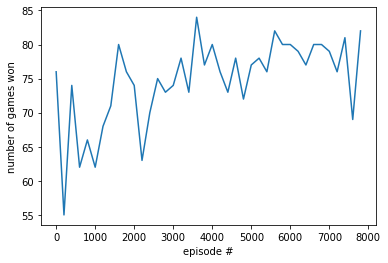

In [ ]:
#moving_avg = np.convolve(games_won, np.ones((200,)), mode='valid')

plt.plot(no_of_games, games_won)
plt.ylabel("number of games won")
plt.xlabel("episode #")
plt.show()